# Proyecto 2: Ingeniería de features, Modelos avanzados e Interpretación de modelos.

**PARTE A - Transformación de Datos**

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa al menostres de las transformaciones de datos propuestas:

1- Detección y eliminación de Outliers

2- Encoding

3- Imputación de valores faltantes

4- Escalado de datos

5- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe

In [1]:
#imporamos las librerias con las que vamos a trabajar en la parte A
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proyecto = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') #importamos el dataset 
proyecto.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
proyecto.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [4]:
proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [5]:
nprop = proyecto.property_type.isin(['Departamento', 'Casa', 'PH'])
nsup=(proyecto['surface_total']>=proyecto['surface_covered'])
nprecio= proyecto['price']<=400000
ncap= proyecto['l2']=='Capital Federal'
nban= proyecto['bathrooms']<=5


proyecto=proyecto[nprop & nsup & nprecio & ncap & nban]
proyecto.shape



(70059, 19)

In [6]:
proyecto.isna().sum()

start_date            0
end_date              0
created_on            0
lat                3057
lon                3057
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

En primer lugar, voy a sacar las columnas con las que no voy a trabajar.
Voy a reemplazar datos faltantes de bathrooms por con el valor 1 ya que todas las casas tienen como minimo un baño. Adicionalmente, voy a reemplazar los datos faltantes de Superficie total y cubierta por la media

In [7]:
dummies= pd.get_dummies(proyecto['property_type'], prefix = 'property_type')
dummies

,property_type_Casa,property_type_Departamento,property_type_PH
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
5,0,0,1
...,...,...,...
146542,0,1,0
146543,0,1,0
146545,0,1,0
146549,0,0,1


In [8]:
concatenado_uno =pd.concat([proyecto,dummies], axis=1)
concatenado_uno

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,surface_covered,price,currency,title,description,property_type,operation_type,property_type_Casa,property_type_Departamento,property_type_PH
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,0,1,0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,0,0,1
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,0,0,1
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,0,0,1
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146542,2019-07-31,2020-01-17,2019-07-31,-34.578688,-58.435533,Argentina,Capital Federal,Palermo,2.0,1.0,...,80.0,170000.0,USD,A extrenar departamento en venta en Palermo,Simpático departamento a estrenar en Palermo H...,Departamento,Venta,0,1,0
146543,2019-07-31,2019-08-14,2019-07-31,-34.581699,-58.433547,Argentina,Capital Federal,Palermo,3.0,2.0,...,81.0,225000.0,USD,Duplex 2 dormitorios super luminoso y amplio !,Para visitarlo contactar a Marta Cell: 0116153...,Departamento,Venta,0,1,0
146545,2019-07-31,2019-09-04,2019-07-31,-34.581425,-58.442707,Argentina,Capital Federal,Palermo,3.0,2.0,...,82.0,399000.0,USD,Palermo Hollywood - 3 Amb c/ dependencia y coc...,"Exclusivo 3 ambientes c/depend., balcón al con...",Departamento,Venta,0,1,0
146549,2019-07-31,2019-10-12,2019-07-31,-34.576573,-58.434394,Argentina,Capital Federal,Palermo,3.0,2.0,...,84.0,178000.0,USD,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH,Venta,0,0,1


In [9]:
proyecto_uno = concatenado_uno.drop(columns = ['start_date', 'end_date', 'lat', 'lon', 'currency','title', 'description', 'operation_type', 'l1', 'created_on', 'property_type', 'l2','l3'])
proyecto_uno

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
...,...,...,...,...,...,...,...,...,...
146542,2.0,1.0,1.0,80.0,80.0,170000.0,0,1,0
146543,3.0,2.0,2.0,85.0,81.0,225000.0,0,1,0
146545,3.0,2.0,2.0,88.0,82.0,399000.0,0,1,0
146549,3.0,2.0,1.0,84.0,84.0,178000.0,0,0,1


Una vez que rellene los datos con los que voy a trabajar, filtro de nuevo el dataset y selecciono los tipos de propiedades, superficies y valores con los que voy a trabajar

Realizamos una serie de graficos para ver y analizar los outliers

Text(0.5, 1.0, 'Distribución de la variable Price:')

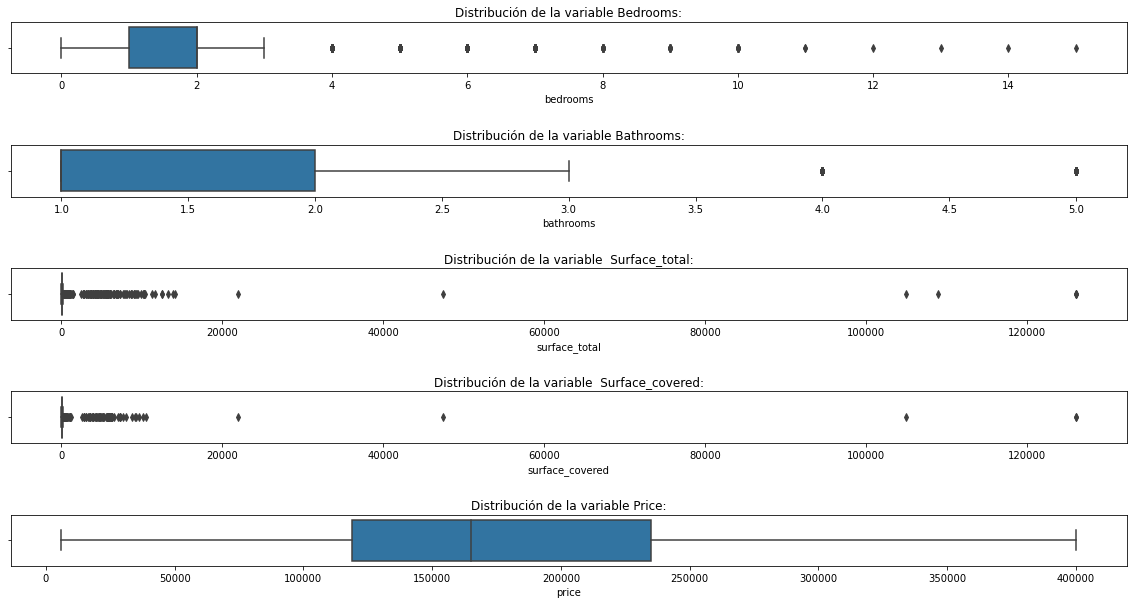

In [10]:
plt.figure(figsize =(20,10))

plt.subplot(9,1,1)

sns.boxplot(data= proyecto_uno, x='bedrooms')
plt.title('Distribución de la variable Bedrooms:')

plt.subplot(9,1,3)

sns.boxplot(data= proyecto_uno, x='bathrooms')
plt.title('Distribución de la variable Bathrooms:')

plt.subplot(9,1,5)

sns.boxplot(data= proyecto_uno, x='surface_total')
plt.title('Distribución de la variable  Surface_total:')

plt.subplot(9,1,7)

sns.boxplot(data= proyecto_uno, x='surface_covered')
plt.title('Distribución de la variable  Surface_covered:')

plt.subplot(9,1,9)

sns.boxplot(data= proyecto_uno, x='price')
plt.title('Distribución de la variable Price:')

Para quitar los outliers, voy a utilizar la regla de tres sigmas (en el proyecto anterior utilice rango intercuartilico)

In [11]:
from scipy.stats import zscore

zscore_precio = zscore(proyecto_uno['price'])
zscore_suptot = zscore(proyecto_uno['surface_total'])
zscore_supcub = zscore(proyecto_uno['surface_covered'])
filtro_zscore = (abs(zscore_precio)>3) |  (abs(zscore_suptot)>3) | (abs(zscore_supcub)>3)
proyecto_dos= proyecto_uno[~filtro_zscore]

In [12]:
proyecto_dos.shape

(69947, 9)

Volvemos a graficar para ver la nueva distribución

Text(0.5, 1.0, 'Distribución de la variable Price:')

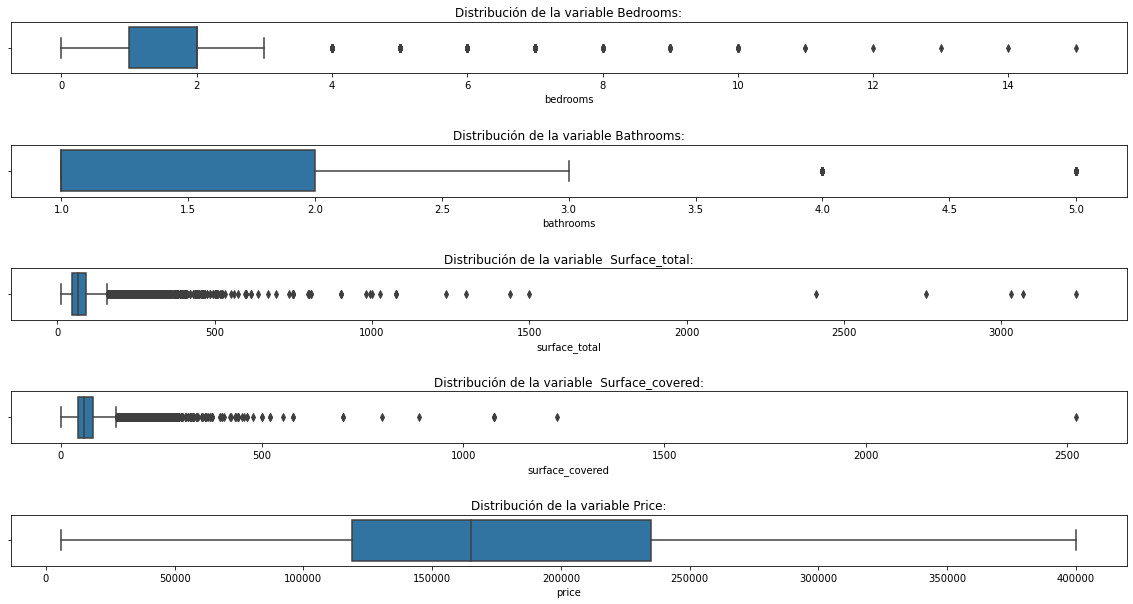

In [13]:
plt.figure(figsize =(20,10))

plt.subplot(9,1,1)

sns.boxplot(data= proyecto_dos, x='bedrooms')
plt.title('Distribución de la variable Bedrooms:')

plt.subplot(9,1,3)

sns.boxplot(data= proyecto_dos, x='bathrooms')
plt.title('Distribución de la variable Bathrooms:')

plt.subplot(9,1,5)

sns.boxplot(data= proyecto_dos, x='surface_total')
plt.title('Distribución de la variable  Surface_total:')

plt.subplot(9,1,7)

sns.boxplot(data= proyecto_dos, x='surface_covered')
plt.title('Distribución de la variable  Surface_covered:')

plt.subplot(9,1,9)

sns.boxplot(data= proyecto_dos, x='price')
plt.title('Distribución de la variable Price:')

Definimos X e y y estandarizamos los datos

In [14]:
X = proyecto_dos[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']] 
y = proyecto_dos['price']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler 

scl = StandardScaler()
X_train_scaler = scl.fit_transform(X_train)
X_train_scaler

array([[-0.70896597, -0.89343343, -0.5948332 , -0.58720037, -0.64283709],
       [-0.70896597, -0.89343343, -0.5948332 , -0.46365492, -0.46335207],
       [ 0.18619195,  0.16753417,  1.04337339, -0.05771987,  0.12638445],
       ...,
       [ 1.9765078 ,  2.28946938, -0.5948332 ,  0.91299437,  1.6135461 ],
       [-0.70896597, -0.89343343, -0.5948332 , -0.53425232, -0.61719638],
       [ 0.18619195,  0.16753417, -0.5948332 , -0.14596662, -0.15566345]])

In [17]:
np.mean(X_train_scaler),np.std(X_train_scaler) #media y desviacion estandar

(1.0640935228246045e-17, 1.0)

In [18]:
X_train_scaler.shape

(55957, 5)

# Entrenando Arboles

Entrenamos nuevamente el Arbol de decision con los datos sin escalar y lo vamos a comparar el entrenamiento sobre los datos escalados


voy a usar el mejor modelo del proyecto 

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Árbol de decision con datos escalados

In [20]:
X_train_dt = X_train
X_test_dt = X_test
y_train_dt =y_train
y_test_dt =y_test

tree = DecisionTreeRegressor(max_depth =3) #La profundidad del árbol es 3
tree.fit (X_train_dt,y_train_dt)

y_train_dt_pred = tree.predict(X_train_dt)
y_test_dt_pred =tree.predict(X_test_dt)

rmse_train_dt =np.sqrt(mean_squared_error(y_train_dt, y_train_dt_pred))
rmse_test_dt =np.sqrt(mean_squared_error(y_test_dt, y_test_dt_pred))
print(f'La raíz de error medio cuadrático en Train es:{rmse_train_dt} ')
print(f'La raíz de error medio cuadrático en Test es:{rmse_test_dt} ')

La raíz de error medio cuadrático en Train es:52026.96705940015 
La raíz de error medio cuadrático en Test es:51768.422937243384 


comparando el resultado del modelo con los datos escalados al del proyecto , podemos ver que con las nuevas decisiones tomadas el mismo funciona mejor, no tiende tanto al overfitting. 
Aunque el numero de arboles optimo sigue siendo el 11, el modelo funciona mucho mejor. 

**PARTE B - Modelos Avanzados**

6- Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

7- Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

8- Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

Vamos a utilizar validacion cruzada

Redefinimos nuevamente las variables


In [21]:
X = proyecto_dos[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']] 
y = proyecto_dos['price']

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [23]:

def entrena_modelo(X_train, X_test, y_train, y_test, modelo):
    
    #Entrenamos el modelo y predecimos y_train e y_test:
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    #Imprimimos las metricas consideradas para evaluar el modelo:
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = modelo.score(X_test, y_test)
    print(f'Score de modelo: {r2}')
    print(f'Raiz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raiz del error cuadrático medio en Test: {rmse_test}')
    
    #Graficamos la distribucion de errores:
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    plt.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    

    return rmse_train,rmse_test,r2

Entrenamos el modelo Random Forest con sus hiperparámetros por default, utilizando train_test_split para ver la performance.

In [24]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
modelo4 = RandomForestRegressor()

Score de modelo: 0.7454183994933147
Raiz del error cuadrático medio en Train: 32813.352291756484
Raiz del error cuadrático medio en Test: 41624.20343338495


C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


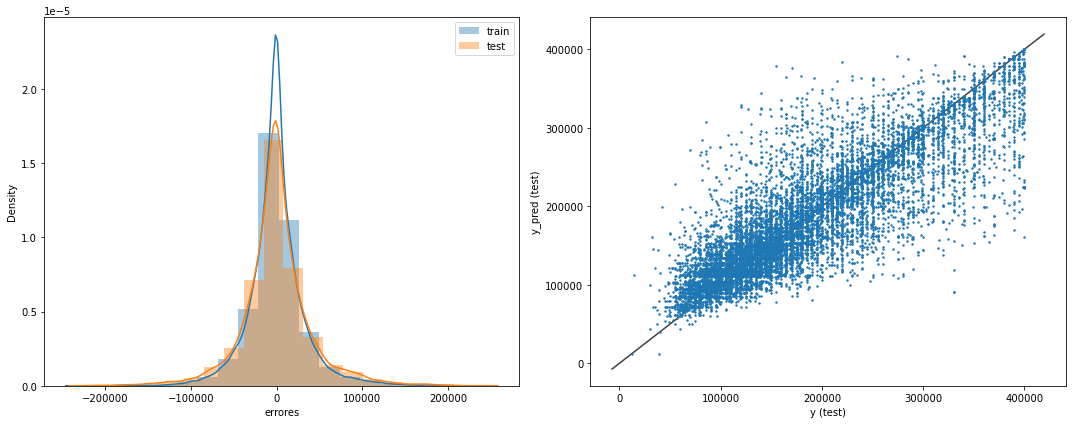

In [26]:
rmse_train_4,rmse_test_4,score4 = entrena_modelo(X_train4, X_test4, y_train4, y_test4, modelo4)

In [62]:
modelo4

RandomForestRegressor()

Trataremos de buscar los mejores hiperparámetros para entrenar el modelo, agregando también validación cruzada con 5 pliegues y evaluaremos su performance:

In [63]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

n_estimators = [100,]
max_depth = [50,]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

In [111]:
modelo5 = GridSearchCV(RandomForestRegressor(),param_grid = random_grid)

Score de modelo: 0.7445438029125993
Raiz del error cuadrático medio en Train: 32815.408595436464
Raiz del error cuadrático medio en Test: 41695.64059412502


C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


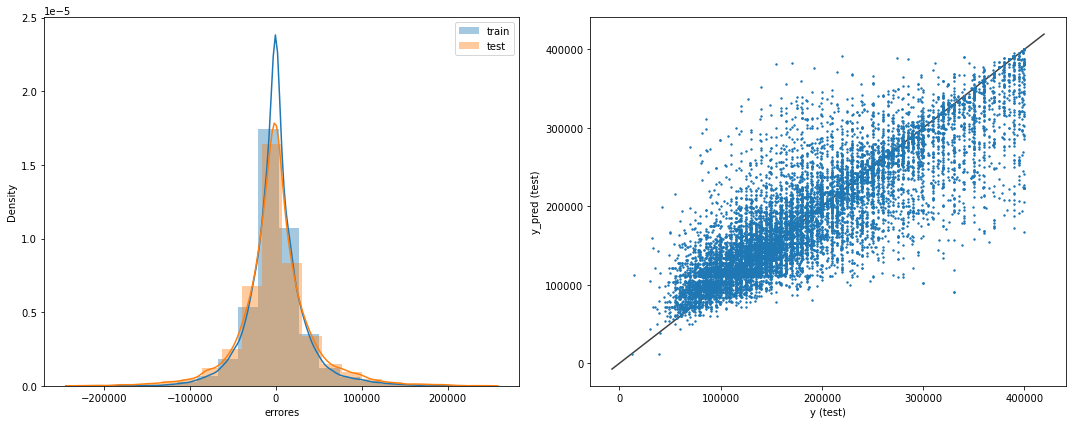

In [112]:
rmse_train_5,rmse_test_5,score5 = entrena_modelo(X_train5, X_test5, y_train5, y_test5, modelo5)

In [113]:
best_params =  modelo5.best_params_
print (f'Los mejores parametros son: {best_params}')

Los mejores parametros son: {'max_depth': 50, 'n_estimators': 100}


lasso

In [114]:
from sklearn.preprocessing import PolynomialFeatures

In [126]:
def evaluar_regresion(model,X,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


In [127]:
poly = PolynomialFeatures(degree = 7, include_bias=False) ### ACA TENDRAS QUE MODIFICAR MAS ADELANTE
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)

evaluar_regresion(reg_2, X,y, X_train_new, X_test_new, y_train, y_test)

Raíz del error cuadrático medio en Train: 85494.16992292456
Raíz del error cuadrático medio en Test: 49114934730.39845


In [128]:
from sklearn.linear_model import Ridge, Lasso

In [129]:
reg_lasso = Lasso(alpha = 0.001)
reg_lasso.fit(X_train_new,y_train)
print(reg_lasso.coef_, reg_lasso.intercept_)

[ 2.05448003e+04  1.91190737e+04  3.13587375e+04  1.45874255e+03
  1.75484807e+03 -4.67414322e+03 -3.24137334e+03 -9.96313221e+03
 -6.77916243e+01  8.45091519e+01 -2.88327425e+03 -4.99299380e+03
 -2.15411153e+02  1.31833159e+02  1.35450565e+04 -1.03143970e+02
  1.80287748e+01 -2.16056383e+00 -2.33405975e+00  2.91498905e-01
  7.41340987e+02  4.31021348e+02  3.13679092e+02  3.43946778e+00
 -9.82543003e+00 -1.32790058e+02  4.98373063e+02  2.47148598e+00
 -9.05696172e+00  2.01522944e+03  2.19489847e+01 -3.16588394e+01
 -3.13400499e-02 -6.48127249e-01 -1.08157350e-01  1.00087386e+02
 -4.89645368e+02  1.94430097e+01 -5.71610358e+00  6.49135231e+02
  4.77709357e+01 -2.90729439e+01  3.71619750e-01 -3.78289446e-01
  4.72578429e-02 -9.32620470e+02  3.41278795e+01 -4.13879353e+01
  3.48386720e-01 -2.72040619e-01  1.71949036e-01  6.32159097e-04
  8.05411956e-04  4.05796777e-05 -9.87584646e-06 -4.27481774e+01
 -8.03802832e+00 -2.15940114e+01  4.70719073e-01  2.62667261e-02
  5.85869929e+00 -1.47169

C:\Users\Juli\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70279622641490.47, tolerance: 37840784659.710075
  model = cd_fast.enet_coordinate_descent(


In [130]:
evaluar_regresion(reg_lasso, X,y, X_train_new, X_test_new, y_train, y_test)

Raíz del error cuadrático medio en Train: 50119.009078162475
Raíz del error cuadrático medio en Test: 802595.0340359234
